# **Baseline**
LinearSVC: 0.9538242473555736,
<br>MultinomialNB: 0.939924057499322,
<br>XGB: 0.8927312177922431

## Loading data

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
fake = pd.read_csv('/content/drive/MyDrive/WIH2001 Lab/Fake.csv')
true = pd.read_csv('/content/drive/MyDrive/WIH2001 Lab/True.csv')

In [ ]:
print (fake)
print (true)

                                                   title  ...               date
0       Donald Trump Sends Out Embarrassing New Year’...  ...  December 31, 2017
1       Drunk Bragging Trump Staffer Started Russian ...  ...  December 31, 2017
2       Sheriff David Clarke Becomes An Internet Joke...  ...  December 30, 2017
3       Trump Is So Obsessed He Even Has Obama’s Name...  ...  December 29, 2017
4       Pope Francis Just Called Out Donald Trump Dur...  ...  December 25, 2017
...                                                  ...  ...                ...
23476  McPain: John McCain Furious That Iran Treated ...  ...   January 16, 2016
23477  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...  ...   January 16, 2016
23478  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...  ...   January 15, 2016
23479  How to Blow $700 Million: Al Jazeera America F...  ...   January 14, 2016
23480  10 U.S. Navy Sailors Held by Iranian Military ...  ...   January 12, 2016

[23481 rows x 4 columns]
  

In [ ]:
fake['flag'] = 0
fake

,title,text,subject,date,flag
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [ ]:
true['flag'] = 1
true

,title,text,subject,date,flag
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [ ]:
df = pd.DataFrame()
df = true.append(fake)

## EDA + Data cleaning

Checking datatypes.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   flag     44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


### Feature Engineering

Removing the duplicates and preventing problems with indexing.

In [ ]:
df = df.drop_duplicates()
df = df.reset_index(drop=True)

We can see that the date format is not the one we need. I will apply the appropriate date format for future purposes.

In [ ]:
df['date'] = df['date'].replace(['19-Feb-18'],'February 19, 2018')
df['date'] = df['date'].replace(['18-Feb-18'],'February 18, 2018')
df['date'] = df['date'].replace(['17-Feb-18'],'February 17, 2018')
df['date'] = df['date'].replace(['16-Feb-18'],'February 16, 2018')
df['date'] = df['date'].replace(['15-Feb-18'],'February 15, 2018')
df['date'] = df['date'].replace(['14-Feb-18'],'February 14, 2018')
df['date'] = df['date'].replace(['13-Feb-18'],'February 13, 2018')

df['date'] = df['date'].str.replace('Dec ', 'December ')
df['date'] = df['date'].str.replace('Nov ', 'November ')
df['date'] = df['date'].str.replace('Oct ', 'October ')
df['date'] = df['date'].str.replace('Sep ', 'September ')
df['date'] = df['date'].str.replace('Aug ', 'August ')
df['date'] = df['date'].str.replace('Jul ', 'July ')
df['date'] = df['date'].str.replace('Jun ', 'June ')
df['date'] = df['date'].str.replace('Apr ', 'April ')
df['date'] = df['date'].str.replace('Mar ', 'March ')
df['date'] = df['date'].str.replace('Feb ', 'February ')
df['date'] = df['date'].str.replace('Jan ', 'January ')

In [ ]:
df['date'] = df['date'].str.replace(' ', '')

In [ ]:
for i, val in enumerate(df['date']):
    df['date'].iloc[i] = pd.to_datetime(df['date'].iloc[i], format='%B%d,%Y', errors='coerce') 
    # by setting the parameter to "coerce", we will set unappropriate values to NaT (null)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
df['date'] = df['date'].astype('datetime64[ns]')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44689 entries, 0 to 44688
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   title    44689 non-null  object        
 1   text     44689 non-null  object        
 2   subject  44689 non-null  object        
 3   date     44679 non-null  datetime64[ns]
 4   flag     44689 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 1.7+ MB


In [ ]:
import datetime as dt
df['year'] = pd.to_datetime(df['date']).dt.to_period('Y')
df['month'] = pd.to_datetime(df['date']).dt.to_period('M')

df['month'] = df['month'].astype(str)

Next we will try to elicit insights from non-text features to get to know if they will help us boost the Text Classifier.

### Fake news dynamics

In [ ]:
sub = df[['month', 'flag']]
sub = sub.dropna()
sub = sub.groupby(['month'])['flag'].sum()

In [ ]:
sub = sub.drop('NaT')

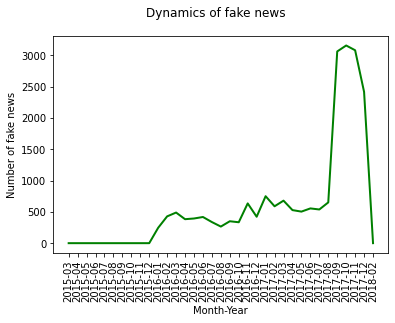

In [ ]:
import matplotlib.pyplot as plt

plt.suptitle('Dynamics of fake news')
plt.xticks(rotation=90)
plt.ylabel('Number of fake news')
plt.xlabel('Month-Year')
plt.plot(sub.index, sub.values, linewidth=2, color='green')

What a spike in the dynamics of fake news in late 2017!

### Subject distribution

In [ ]:
sub2 = df[['subject', 'flag']]
sub2 = sub2.dropna()
sub2 = sub2.groupby(['subject'])['flag'].sum()

<BarContainer object of 8 artists>

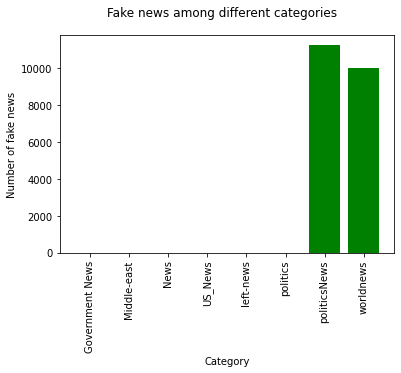

In [ ]:
plt.suptitle('Fake news among different categories')
plt.xticks(rotation=90)
plt.ylabel('Number of fake news')
plt.xlabel('Category')

plt.bar(sub2.index, height=sub2.values, color='green')
#ax1.plot(x, y)
#ax2.plot(x, -y)

As we have discovered, such features as

*   subject
*   date

might be also crucial for the algorithm to decide whether the piece of news is fake or real. We will try to include them in the model.

In [ ]:
nlp = df

### Word Cloud visualization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = nlp[nlp['flag'] == 1]['title'].iloc[0:500] # We will take a slice of fake news, to see what vocabulary there looks like
tfidf1 = TfidfVectorizer()
vecs = tfidf1.fit_transform(corpus)

feature_names = tfidf1.get_feature_names()
dense = vecs.todense()
list_words = dense.tolist()
df_words = pd.DataFrame(list_words, columns=feature_names)

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
df_words.T.sum(axis=1)
Cloud = WordCloud(background_color="white", max_words=100).generate_from_frequencies(df_words.T.sum(axis=1))

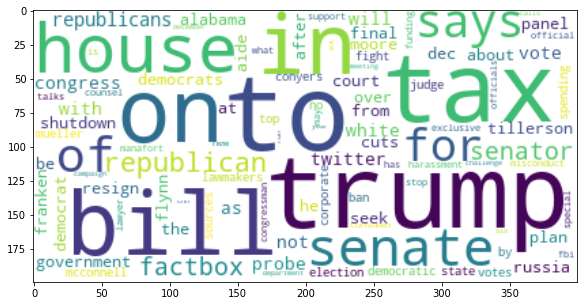

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.imshow(Cloud, interpolation='bilinear')

### Tfidf-vectorizing

First, I will tokenize words to pass it on to the SnowballStemmer method, which will take out stems from words.

In [ ]:
import nltk
nltk.download('punkt')
from nltk import word_tokenize

nlp['title'] = nlp['title'].apply(lambda x: word_tokenize(str(x)))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


An important step in every NLP-task is to get the roots of words in order not to distract the model by 'different' words.

In [ ]:
from nltk.stem import SnowballStemmer

snowball = SnowballStemmer(language='english')
nlp['title'] = nlp['title'].apply(lambda x: [snowball.stem(y) for y in x])

In [ ]:
nlp['title'] = nlp['title'].apply(lambda x: ' '.join(x))

And finally TfidfVectorizing. You can also take CountVectorizer, but I prefer Tfidf as it has masses of advantages.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X_text = tfidf.fit_transform(nlp['title'])

## Data Splitting

**'flag'** will be our label.
<br> The other attributes will be our features.
<br> 67% of the data will be used as training set, the other 33% wil be used as testing set.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_text, nlp['flag'], test_size=0.33, random_state=1)

## Model Building

I will use several traditional approaches (which are known as efficient for text classification) to solve the classification task, such as:

*   SVM
*   Naive Bayes
*   XGBoost


In [ ]:
scores = {}

### Linear SVC

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report

clf = LinearSVC(max_iter=100, C=5.0)
clf.fit(X_train, y_train)

y_pred_SVM = clf.predict(X_test)
print (classification_report(y_test,y_pred_SVM))
print (cross_val_score(clf, X_text, nlp['flag'], cv=3))
print (accuracy_score(y_pred_SVM, y_test))

scores['LinearSVC'] = accuracy_score(y_pred_SVM, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


              precision    recall  f1-score   support

           0       0.96      0.95      0.96      7687
           1       0.95      0.95      0.95      7061

    accuracy                           0.95     14748
   macro avg       0.95      0.95      0.95     14748
weighted avg       0.95      0.95      0.95     14748

[0.89883869 0.92702739 0.92158969]
0.9538920531597505


### Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

clf2 = MultinomialNB(alpha=1.0)
clf2.fit(X_train, y_train)

y_pred_MNB = clf2.predict(X_test)
print (classification_report(y_test,y_pred_MNB))
print(cross_val_score(clf2, X_text, nlp['flag'], cv=3))
print(accuracy_score(y_pred_MNB, y_test))

scores['MultinomialNB'] = accuracy_score(y_pred_MNB, y_test)

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      7687
           1       0.96      0.92      0.94      7061

    accuracy                           0.94     14748
   macro avg       0.94      0.94      0.94     14748
weighted avg       0.94      0.94      0.94     14748

[0.88957508 0.89406552 0.92883996]
0.939924057499322


### XGBoost

In [ ]:
from xgboost import XGBClassifier

clf3 = XGBClassifier(eval_metric='rmse', use_label_encoder=False, )
clf3.fit(X_train, y_train)

y_pred_XGB = clf3.predict(X_test)
print (classification_report(y_test,y_pred_XGB))
print(cross_val_score(clf3, X_text, nlp['flag'], cv=3))
print(accuracy_score(y_pred_XGB, y_test))

scores['XGB'] = accuracy_score(y_pred_XGB, y_test)

              precision    recall  f1-score   support

           0       0.95      0.84      0.89      7687
           1       0.85      0.95      0.89      7061

    accuracy                           0.89     14748
   macro avg       0.90      0.89      0.89     14748
weighted avg       0.90      0.89      0.89     14748

[0.82694502 0.90077873 0.86399033]
0.8927312177922431


In [ ]:
scores

{'LinearSVC': 0.9538920531597505,
 'MultinomialNB': 0.939924057499322,
 'XGB': 0.8927312177922431}

# **After changes**

## Loading data

In [ ]:
fake2 = pd.read_csv('/content/drive/MyDrive/WIH2001 Lab/Fake.csv')
true2 = pd.read_csv('/content/drive/MyDrive/WIH2001 Lab/True.csv')

In [ ]:
fake2['flag'] = 0
fake2

,title,text,subject,date,flag
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [ ]:
true2['flag'] = 1
true2

,title,text,subject,date,flag
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [ ]:
df2 = pd.DataFrame()
df2 = true2.append(fake2)

In [ ]:
df2.head()

,title,text,subject,date,flag
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [ ]:
df2['text']=df2['title']+df2['text']
df2=df2.drop(['title'], axis=1)

In [ ]:
df2.head()

,text,subject,date,flag
0,"As U.S. budget fight looms, Republicans flip t...",politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,politicsNews,"December 29, 2017",1


## EDA + Data Cleaning

### Visualization

Counting and visualizing real and fake data.

0    23481
1    21417
Name: flag, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


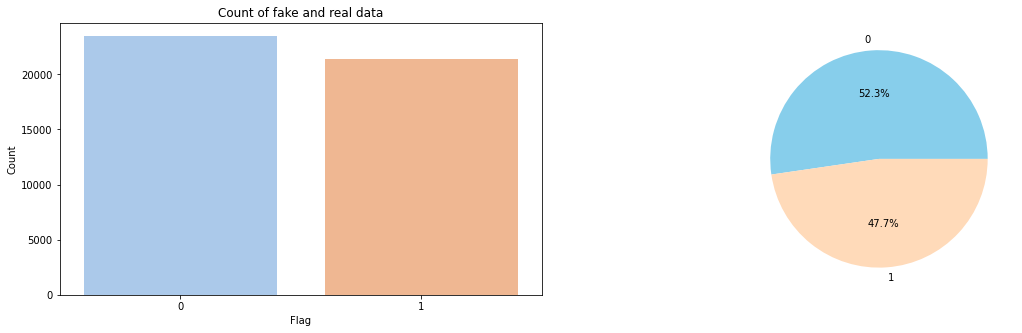

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 0 = fake
# 1 = real

print(df2["flag"].value_counts())
fig, ax = plt.subplots(1,2, figsize=(19, 5))
g1 = sns.countplot(df2.flag,ax=ax[0],palette="pastel");
g1.set_title("Count of fake and real data")
g1.set_ylabel("Count")
g1.set_xlabel("Flag")
g2 = plt.pie(df2["flag"].value_counts().values,explode=[0,0],labels=df2.flag.value_counts().index, autopct='%1.1f%%',colors=['SkyBlue','PeachPuff'])
fig.show()

### Subject Distribution
We visualized the distribution of different subjects according to the nature of the news: 'Fake' or 'True'.

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64


Text(0.5, 1.0, 'Distribution of The Subject According to Real and Fake Data')

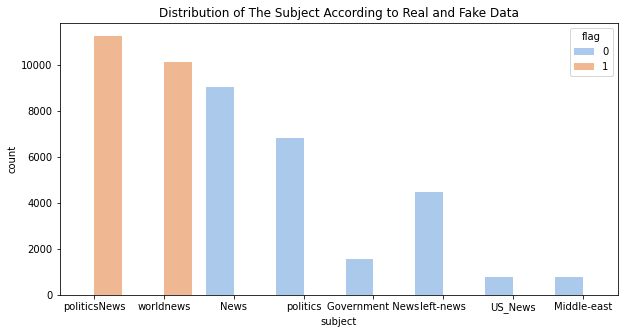

In [ ]:
print(df2.subject.value_counts())
plt.figure(figsize=(10, 5))

ax = sns.countplot(x="subject",  hue='flag', data=df2, palette="pastel")
plt.title("Distribution of The Subject According to Real and Fake Data")

### Feature Engineering

Check if there's any null values. Drop the row which contains null values, if there's any.

In [ ]:
df2.isnull().sum()

text       0
subject    0
date       0
flag       0
dtype: int64

Lowercase words, remove the word 'Reuters', remove square brackets, HTML tags, words containing numbers and punctuations.

Cleaning our text data is important so that the model wont be fed noises that would not help with the prediction.
The word reuters was removed as it always appear in the real news article therefore I removed it as it is an obvious indicator to the model.

In [ ]:
import re
import string

def clean_text(text):
    
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('Reuters','',text)
    return text

df2['text'] = df2['text'].apply(lambda x:clean_text(x))

Removing the duplicates and preventing problems with indexing.

In [ ]:
df2 = df2.drop_duplicates()
df2 = df2.reset_index(drop=True)

Reformatting the data to ease future analysis.

In [ ]:
df2['date'] = df2['date'].replace(['19-Feb-18'],'February 19, 2018')
df2['date'] = df2['date'].replace(['18-Feb-18'],'February 18, 2018')
df2['date'] = df2['date'].replace(['17-Feb-18'],'February 17, 2018')
df2['date'] = df2['date'].replace(['16-Feb-18'],'February 16, 2018')
df2['date'] = df2['date'].replace(['15-Feb-18'],'February 15, 2018')
df2['date'] = df2['date'].replace(['14-Feb-18'],'February 14, 2018')
df2['date'] = df2['date'].replace(['13-Feb-18'],'February 13, 2018')

df2['date'] = df2['date'].str.replace('Dec ', 'December ')
df2['date'] = df2['date'].str.replace('Nov ', 'November ')
df2['date'] = df2['date'].str.replace('Oct ', 'October ')
df2['date'] = df2['date'].str.replace('Sep ', 'September ')
df2['date'] = df2['date'].str.replace('Aug ', 'August ')
df2['date'] = df2['date'].str.replace('Jul ', 'July ')
df2['date'] = df2['date'].str.replace('Jun ', 'June ')
df2['date'] = df2['date'].str.replace('Apr ', 'April ')
df2['date'] = df2['date'].str.replace('Mar ', 'March ')
df2['date'] = df2['date'].str.replace('Feb ', 'February ')
df2['date'] = df2['date'].str.replace('Jan ', 'January ')

In [ ]:
df2['date'] = df2['date'].str.replace(' ', '')

In [ ]:
for i, val in enumerate(df2['date']):
    df2['date'].iloc[i] = pd.to_datetime(df2['date'].iloc[i], format='%B%d,%Y', errors='coerce') 
    # by setting the parameter to "coerce", we will set unappropriate values to NaT (null)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
df2['date'] = df2['date'].astype('datetime64[ns]')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44689 entries, 0 to 44688
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   text     44689 non-null  object        
 1   subject  44689 non-null  object        
 2   date     44679 non-null  datetime64[ns]
 3   flag     44689 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 1.4+ MB


In [ ]:
import datetime as dt
df2['year'] = pd.to_datetime(df2['date']).dt.to_period('Y')
df2['month'] = pd.to_datetime(df2['date']).dt.to_period('M')

df2['month'] = df2['month'].astype(str)

Next we will try to elicit insights from non-text features to get to know if they will help us boost the Text Classifier.

### Fake News Dynamics

In [ ]:
sub = df2[['month', 'flag']]
sub = sub.dropna()
sub = sub.groupby(['month'])['flag'].sum()

In [ ]:
sub = sub.drop('NaT')

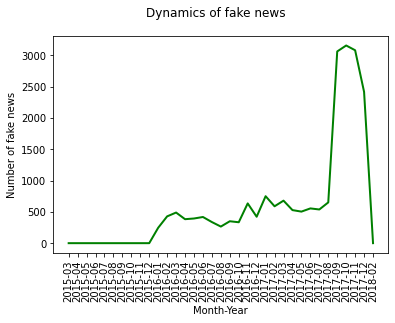

In [ ]:
import matplotlib.pyplot as plt

plt.suptitle('Dynamics of fake news')
plt.xticks(rotation=90)
plt.ylabel('Number of fake news')
plt.xlabel('Month-Year')
plt.plot(sub.index, sub.values, linewidth=2, color='green')

### Word Cloud Visualization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = df2[df2['flag'] == 1]['text'].iloc[0:500]
tfidf1 = TfidfVectorizer()
vecs = tfidf1.fit_transform(corpus)

feature_names = tfidf1.get_feature_names()
dense = vecs.todense()
list_words = dense.tolist()
df_words = pd.DataFrame(list_words, columns=feature_names)

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
df_words.T.sum(axis=1)
Cloud = WordCloud(background_color="white", max_words=100).generate_from_frequencies(df_words.T.sum(axis=1))

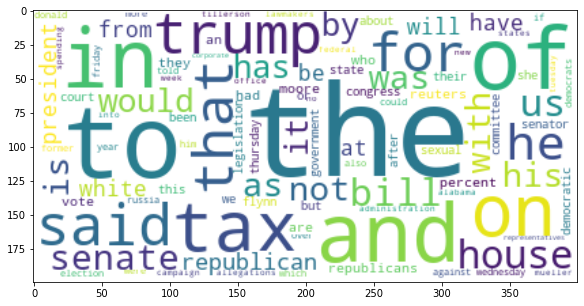

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.imshow(Cloud, interpolation='bilinear')

Remove stopwords

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop = stopwords.words('english')
df2['text'] = df2['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Lemmatize words**
<br>Instead of stemming, we use lemmatization this time.

Words were lemmatized so that only root words are retain in the data and fed into the model

In [ ]:
nltk.download('wordnet')
  
def lemmatize_words(text):
    wnl = nltk.stem.WordNetLemmatizer()
    lem = ' '.join([wnl.lemmatize(word) for word in text.split()])    
    return lem

df2['text'] = df2['text'].apply(lemmatize_words)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
df2.head()

,text,subject,date,flag,year,month
0,u budget fight loom republican flip fiscal scr...,politicsNews,2017-12-31,1,2017,2017-12
1,u military accept transgender recruit monday p...,politicsNews,2017-12-29,1,2017,2017-12
2,senior u republican senator let mr mueller job...,politicsNews,2017-12-31,1,2017,2017-12
3,fbi russia probe helped australian diplomat ti...,politicsNews,2017-12-30,1,2017,2017-12
4,trump want postal service charge much amazon s...,politicsNews,2017-12-29,1,2017,2017-12


### Tfidf-vectorizing

In [ ]:
tfidf = TfidfVectorizer()
X_text = tfidf.fit_transform(df2['text'])

### Data Splitting

**'flag'** will be our label.
<br> The other attributes will be our features.
<br> 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_text, df2['flag'], test_size=0.33, random_state=1)

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_text, df2['flag'], test_size=0.2, random_state=1)

In [ ]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_text, df2['flag'], test_size=0.3, random_state=1)

In [ ]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_text, df2['flag'], test_size=0.3, random_state=10)

In [ ]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(X_text, df2['flag'], test_size=0.4, random_state=1)

## Model Building

In [ ]:
scores = {}
scores2 = {}
scores3 = {}
scores4 = {}
scores5 = {}

### Linear SVC

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, classification_report

clf = LinearSVC()
clf.fit(X_train, y_train)

SVCpipe = Pipeline(steps=[('SVC',LinearSVC())])

param_grid = {'C': [0.1,1, 10, 100],'max_iter':[10,50,100,500]}

clf_GS = GridSearchCV(clf,param_grid,cv=5,return_train_score=True)
clf_GS.fit(X_train, y_train)

In [ ]:
print(clf_GS.best_estimator_)

LinearSVC(C=100, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=10,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)


In [ ]:
y_pred_SVC = clf_GS.best_estimator_.predict(X_test)

print (classification_report(y_test,y_pred_SVC))
print(cross_val_score(clf_GS, X_text, df2['flag'], cv=3))
print(accuracy_score(y_pred_SVC, y_test))

scores['LinearSVC'] = accuracy_score(y_pred_SVC, y_test)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7687
           1       0.99      0.99      0.99      7061

    accuracy                           0.99     14748
   macro avg       0.99      0.99      0.99     14748
weighted avg       0.99      0.99      0.99     14748



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[0.98422501 0.98113588 0.98758056]
0.9938974776240846


In [ ]:
clf_GS.fit(X_train2, y_train2)

In [ ]:
y_pred_SVM2 = clf_GS.best_estimator_.predict(X_test2)
print (classification_report(y_test2,y_pred_SVM2))
print(cross_val_score(clf_GS, X_text, df2['flag'], cv=3))
print(accuracy_score(y_pred_SVM2, y_test2))

scores2['LinearSVC'] = accuracy_score(y_pred_SVM2, y_test2)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4635
           1       0.99      1.00      0.99      4303

    accuracy                           0.99      8938
   macro avg       0.99      0.99      0.99      8938
weighted avg       0.99      0.99      0.99      8938



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[0.98301671 0.98106874 0.98744629]
0.9947415529201163


In [ ]:
clf_GS.fit(X_train3, y_train3)

In [ ]:
y_pred_SVM3 = clf_GS.best_estimator_.predict(X_test3)
print (classification_report(y_test3,y_pred_SVM3))
print(cross_val_score(clf_GS, X_text, df2['flag'], cv=3))
print(accuracy_score(y_pred_SVM3, y_test3))

scores3['LinearSVC'] = accuracy_score(y_pred_SVM3, y_test3)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6999
           1       0.99      0.99      0.99      6408

    accuracy                           0.99     13407
   macro avg       0.99      0.99      0.99     13407
weighted avg       0.99      0.99      0.99     13407



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[0.98355374 0.98227712 0.98771482]
0.9938837920489296


In [ ]:
clf_GS.fit(X_train4, y_train4)

In [ ]:
y_pred_SVM4 = clf_GS.best_estimator_.predict(X_test4)
print (classification_report(y_test4,y_pred_SVM4))
print(cross_val_score(clf_GS, X_text, df2['flag'], cv=3))
print(accuracy_score(y_pred_SVM4, y_test4))

scores4['LinearSVC'] = accuracy_score(y_pred_SVM4, y_test4)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7003
           1       0.99      0.99      0.99      6404

    accuracy                           0.99     13407
   macro avg       0.99      0.99      0.99     13407
weighted avg       0.99      0.99      0.99     13407



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[0.98281533 0.98053169 0.98771482]
0.9938837920489296


In [ ]:
clf_GS.fit(X_train5, y_train5)

In [ ]:
y_pred_SVM5 = clf_GS.best_estimator_.predict(X_test5)
print (classification_report(y_test5,y_pred_SVM5))
print(cross_val_score(clf_GS, X_text, df2['flag'], cv=3))
print(accuracy_score(y_pred_SVM5, y_test5))

scores5['LinearSVC'] = accuracy_score(y_pred_SVM5, y_test5)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      9337
           1       0.99      0.99      0.99      8539

    accuracy                           0.99     17876
   macro avg       0.99      0.99      0.99     17876
weighted avg       0.99      0.99      0.99     17876



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[0.98449352 0.98100161 0.98811762]
0.9939024390243902


### Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

clf2 = MultinomialNB()
clf2.fit(X_train, y_train)

NBpipe = Pipeline(steps=[('Multinomial NB',MultinomialNB())])

param_grid = {'alpha': [1,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]}

clf2_GS = GridSearchCV(clf2, param_grid,cv=5,return_train_score=True)
clf2_GS.fit(X_train,y_train)

In [ ]:
print(clf2_GS.best_estimator_)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)


In [ ]:
y_pred_NB = clf2_GS.best_estimator_.predict(X_test)

print (classification_report(y_test,y_pred_NB))
print(cross_val_score(clf2_GS, X_text, df2['flag'], cv=3))
print(accuracy_score(y_pred_NB, y_test))

scores['Multinomial NB'] = accuracy_score(y_pred_NB, y_test)

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      7687
           1       0.95      0.96      0.95      7061

    accuracy                           0.95     14748
   macro avg       0.95      0.95      0.95     14748
weighted avg       0.95      0.95      0.95     14748

[0.89138753 0.88265306 0.92111976]
0.9548413344182262


In [ ]:
clf2_GS.fit(X_train2,y_train2)

In [ ]:
y_pred_NB2 = clf2_GS.best_estimator_.predict(X_test2)

print (classification_report(y_test2,y_pred_NB2))
print(cross_val_score(clf2_GS, X_text, df2['flag'], cv=3))
print(accuracy_score(y_pred_NB2, y_test2))

scores2['Multinomial NB'] = accuracy_score(y_pred_NB2, y_test2)

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      4635
           1       0.95      0.96      0.96      4303

    accuracy                           0.96      8938
   macro avg       0.96      0.96      0.96      8938
weighted avg       0.96      0.96      0.96      8938

[0.89138753 0.88265306 0.92111976]
0.9565898411277691


In [ ]:
clf2_GS.fit(X_train3,y_train3)

GridSearchCV(cv=5, error_score=nan,
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2,
                                   0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [ ]:
y_pred_NB3 = clf2_GS.best_estimator_.predict(X_test3)

print (classification_report(y_test3,y_pred_NB3))
print(cross_val_score(clf2_GS, X_text, df2['flag'], cv=3))
print(accuracy_score(y_pred_NB3, y_test3))

scores3['Multinomial NB'] = accuracy_score(y_pred_NB3, y_test3)

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      6999
           1       0.95      0.96      0.95      6408

    accuracy                           0.95     13407
   macro avg       0.95      0.95      0.95     13407
weighted avg       0.95      0.95      0.95     13407

[0.89138753 0.88265306 0.92111976]
0.9539792645632879


In [ ]:
clf2_GS.fit(X_train4,y_train4)

GridSearchCV(cv=5, error_score=nan,
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2,
                                   0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [ ]:
y_pred_NB4 = clf2_GS.best_estimator_.predict(X_test4)

print (classification_report(y_test4,y_pred_NB4))
print(cross_val_score(clf2_GS, X_text, df2['flag'], cv=3))
print(accuracy_score(y_pred_NB4, y_test4))

scores4['Multinomial NB'] = accuracy_score(y_pred_NB4, y_test4)

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      7003
           1       0.95      0.95      0.95      6404

    accuracy                           0.95     13407
   macro avg       0.95      0.95      0.95     13407
weighted avg       0.95      0.95      0.95     13407

[0.89138753 0.88265306 0.92111976]
0.9511449242932797


In [ ]:
clf2_GS.fit(X_train5,y_train5)

GridSearchCV(cv=5, error_score=nan,
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2,
                                   0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [ ]:
y_pred_NB5 = clf2_GS.best_estimator_.predict(X_test5)

print (classification_report(y_test5,y_pred_NB5))
print(cross_val_score(clf2_GS, X_text, df2['flag'], cv=3))
print(accuracy_score(y_pred_NB5, y_test5))

scores5['Multinomial NB'] = accuracy_score(y_pred_NB5, y_test5)

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      9337
           1       0.94      0.96      0.95      8539

    accuracy                           0.95     17876
   macro avg       0.95      0.95      0.95     17876
weighted avg       0.95      0.95      0.95     17876

[0.89138753 0.88265306 0.92111976]
0.9526180353546655


### XGBoost

In [ ]:
from xgboost import XGBClassifier

clf3 = XGBClassifier(eval_metric='rmse', use_label_encoder=False)
clf3.fit(X_train, y_train)

XGBpipe = Pipeline([('XGBoost',XGBClassifier())])

param_grid = {'max_depth': [10,20,30]}       

clf3_GS = GridSearchCV(clf3_GS, param_grid,cv=5,return_train_score=True)
clf3_GS.fit(X_train,y_train)

In [ ]:
print(clf3_GS.best_estimator_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='rmse',
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, use_label_encoder=False, verbosity=1)


In [ ]:
y_pred_XGB = clf3_GS.best_estimator_.predict(X_test)

print (classification_report(y_test,y_pred_XGB))
print(cross_val_score(clf3_GS, X_text, df2['flag'], cv=3))
print(accuracy_score(y_pred_XGB, y_test))

scores['XGB'] = accuracy_score(y_pred_XGB, y_test)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7687
           1       0.99      0.99      0.99      7061

    accuracy                           0.99     14748
   macro avg       0.99      0.99      0.99     14748
weighted avg       0.99      0.99      0.99     14748

[0.9730147  0.98053169 0.98489527]
0.9914564686737185


In [ ]:
clf3_GS.fit(X_train2,y_train2)

In [ ]:
y_pred_XGB2 = clf3_GS.best_estimator_.predict(X_test2)

print (classification_report(y_test2,y_pred_XGB2))
print(cross_val_score(clf3_GS, X_text, df2['flag'], cv=3))
print(accuracy_score(y_pred_XGB2, y_test2))

scores2['XGB'] = accuracy_score(y_pred_XGB2, y_test2)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4635
           1       0.99      0.99      0.99      4303

    accuracy                           0.99      8938
   macro avg       0.99      0.99      0.99      8938
weighted avg       0.99      0.99      0.99      8938

[0.9730147  0.98053169 0.98489527]
0.9919445066010293


In [ ]:
clf3_GS.fit(X_train3,y_train3)

In [ ]:
y_pred_XGB3 = clf3_GS.best_estimator_.predict(X_test3)

print (classification_report(y_test3,y_pred_XGB3))
print(cross_val_score(clf3_GS, X_text, df2['flag'], cv=3))
print(accuracy_score(y_pred_XGB3, y_test3))

scores3['XGB'] = accuracy_score(y_pred_XGB3, y_test3)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6999
           1       0.99      0.99      0.99      6408

    accuracy                           0.99     13407
   macro avg       0.99      0.99      0.99     13407
weighted avg       0.99      0.99      0.99     13407

[0.9730147  0.98053169 0.98489527]
0.9914969791899754


In [ ]:
clf3_GS.fit(X_train4,y_train4)

In [ ]:
y_pred_XGB4 = clf3_GS.best_estimator_.predict(X_test4)

print (classification_report(y_test4,y_pred_XGB4))
print(cross_val_score(clf3_GS, X_text, df2['flag'], cv=3))
print(accuracy_score(y_pred_XGB4, y_test4))

scores4['XGB'] = accuracy_score(y_pred_XGB4, y_test4)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7003
           1       1.00      0.99      0.99      6404

    accuracy                           0.99     13407
   macro avg       0.99      0.99      0.99     13407
weighted avg       0.99      0.99      0.99     13407

[0.9730147  0.98053169 0.98489527]
0.9921682703065563


In [ ]:
clf3_GS.fit(X_train5,y_train5)

In [ ]:
y_pred_XGB5 = clf3_GS.best_estimator_.predict(X_test5)

print (classification_report(y_test5,y_pred_XGB5))
print(cross_val_score(clf3_GS, X_text, df2['flag'], cv=3))
print(accuracy_score(y_pred_XGB5, y_test5))

scores5['XGB'] = accuracy_score(y_pred_XGB5, y_test5)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      9337
           1       0.99      0.99      0.99      8539

    accuracy                           0.99     17876
   macro avg       0.99      0.99      0.99     17876
weighted avg       0.99      0.99      0.99     17876

[0.9730147  0.98053169 0.98489527]
0.990713806220631


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf4 = RandomForestClassifier()
clf4.fit(X_train, y_train)

y_pred_RF = clf4.predict(X_test)
print(classification_report(y_test,y_pred_RF))
print(cross_val_score(clf4, X_text, df2['flag'], cv=3))
print(accuracy_score(y_pred_RF, y_test))

scores['RandomForest'] = accuracy_score(y_pred_RF, y_test)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7687
           1       0.99      0.99      0.99      7061

    accuracy                           0.99     14748
   macro avg       0.99      0.99      0.99     14748
weighted avg       0.99      0.99      0.99     14748

[0.98227831 0.96012352 0.97079753]
0.9889476539191755


In [ ]:
clf4.fit(X_train2, y_train2)

y_pred_RF2 = clf4.predict(X_test2)
print(classification_report(y_test2,y_pred_RF2))
print(cross_val_score(clf4, X_text, df2['flag'], cv=3))
print(accuracy_score(y_pred_RF2, y_test2))

scores2['RandomForest'] = accuracy_score(y_pred_RF2, y_test2)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4635
           1       0.99      0.99      0.99      4303

    accuracy                           0.99      8938
   macro avg       0.99      0.99      0.99      8938
weighted avg       0.99      0.99      0.99      8938

[0.97986172 0.96603115 0.97180451]
0.9898187513985232


In [ ]:
clf4.fit(X_train3, y_train3)

y_pred_RF3 = clf4.predict(X_test3)
print(classification_report(y_test3,y_pred_RF3))
print(cross_val_score(clf4, X_text, df2['flag'], cv=3))
print(accuracy_score(y_pred_RF3, y_test3))

scores3['RandomForest'] = accuracy_score(y_pred_RF3, y_test3)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6999
           1       0.99      0.99      0.99      6408

    accuracy                           0.99     13407
   macro avg       0.99      0.99      0.99     13407
weighted avg       0.99      0.99      0.99     13407

[0.98100289 0.9594522  0.97113319]
0.9882896994107556


In [ ]:
clf4.fit(X_train4, y_train4)

y_pred_RF4 = clf4.predict(X_test4)
print(classification_report(y_test4,y_pred_RF4))
print(cross_val_score(clf4, X_text, df2['flag'], cv=3))
print(accuracy_score(y_pred_RF4, y_test4))

scores4['RandomForest'] = accuracy_score(y_pred_RF4, y_test4)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7003
           1       0.99      0.99      0.99      6404

    accuracy                           0.99     13407
   macro avg       0.99      0.99      0.99     13407
weighted avg       0.99      0.99      0.99     13407

[0.9827482  0.96609828 0.97294576]
0.9877675840978594


In [ ]:
clf4.fit(X_train5, y_train5)

y_pred_RF5 = clf4.predict(X_test5)
print(classification_report(y_test5,y_pred_RF5))
print(cross_val_score(clf4, X_text, df2['flag'], cv=3))
print(accuracy_score(y_pred_RF5, y_test5))

scores5['RandomForest'] = accuracy_score(y_pred_RF5, y_test5)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      9337
           1       0.98      0.99      0.99      8539

    accuracy                           0.99     17876
   macro avg       0.99      0.99      0.99     17876
weighted avg       0.99      0.99      0.99     17876

[0.9812714  0.96945489 0.97234157]
0.9882524054598344


### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

clf5 = LogisticRegression()
clf5.fit(X_train, y_train)

LRpipe = Pipeline(steps=[('logistic_Reg', LogisticRegression(solver='liblinear'))])

C = np.logspace(-4, 4, 50)

parameters = dict(logistic_Reg__C=C)
                  
clf5_GS = GridSearchCV(LRpipe, parameters)
clf5_GS.fit(X_train, y_train)

In [ ]:
print(clf5_GS.best_estimator)

LogisticRegression(C=10000.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


In [ ]:
y_pred_LR = clf5_GS.predict(X_test)
print(classification_report(y_test,y_pred_LR))
print(cross_val_score(clf5_GS, X_text, df2['flag'], cv=3))
print(accuracy_score(y_pred_LR, y_test))

scores['LogisticRegression'] = accuracy_score(y_pred_LR, y_test)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      7687
           1       0.99      1.00      0.99      7061

    accuracy                           0.99     14748
   macro avg       0.99      0.99      0.99     14748
weighted avg       0.99      0.99      0.99     14748

[0.98268108 0.98174006 0.98852041]
0.9940330892324383


In [ ]:
clf5_GS.fit(X_train2, y_train2)

In [ ]:
y_pred_LR2 = clf5_GS.predict(X_test2)
print(classification_report(y_test2,y_pred_LR2))
print(cross_val_score(clf5_GS, X_text, df2['flag'], cv=3))
print(accuracy_score(y_pred_LR2, y_test2))

scores2['LogisticRegression'] = accuracy_score(y_pred_LR2, y_test2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4635
           1       0.99      1.00      1.00      4303

    accuracy                           1.00      8938
   macro avg       1.00      1.00      1.00      8938
weighted avg       1.00      1.00      1.00      8938

[0.98268108 0.98174006 0.98852041]
0.9951890803311703


In [ ]:
clf5_GS.fit(X_train3, y_train3)

In [ ]:
y_pred_LR3 = clf5_GS.predict(X_test3)
print(classification_report(y_test3,y_pred_LR3))
print(cross_val_score(clf5_GS, X_text, df2['flag'], cv=3))
print(accuracy_score(y_pred_LR3, y_test3))

scores3['LogisticRegression'] = accuracy_score(y_pred_LR3, y_test3)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      6999
           1       0.99      0.99      0.99      6408

    accuracy                           0.99     13407
   macro avg       0.99      0.99      0.99     13407
weighted avg       0.99      0.99      0.99     13407

[0.98268108 0.98174006 0.98852041]
0.9940329678526143


In [ ]:
clf5_GS.fit(X_train4, y_train4)

In [ ]:
y_pred_LR4 = clf5_GS.predict(X_test4)
print(classification_report(y_test4,y_pred_LR4))
print(cross_val_score(clf5_GS, X_text, df2['flag'], cv=3))
print(accuracy_score(y_pred_LR4, y_test4))

scores4['LogisticRegression'] = accuracy_score(y_pred_LR4, y_test4)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7003
           1       0.99      0.99      0.99      6404

    accuracy                           0.99     13407
   macro avg       0.99      0.99      0.99     13407
weighted avg       0.99      0.99      0.99     13407

[0.98268108 0.98174006 0.98852041]
0.9944059073618259


In [ ]:
clf5_GS.fit(X_train5, y_train5)

In [ ]:
y_pred_LR5 = clf5_GS.predict(X_test5)
print(classification_report(y_test5,y_pred_LR5))
print(cross_val_score(clf5_GS, X_text, df2['flag'], cv=3))
print(accuracy_score(y_pred_LR5, y_test5))

scores5['LogisticRegression'] = accuracy_score(y_pred_LR5, y_test5)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      9337
           1       0.99      0.99      0.99      8539

    accuracy                           0.99     17876
   macro avg       0.99      0.99      0.99     17876
weighted avg       0.99      0.99      0.99     17876

[0.98268108 0.98174006 0.98852041]
0.9942380845826807


### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf6 = DecisionTreeClassifier()
clf6.fit(X_train,y_train)

DTpipe = Pipeline(steps=[('Decision Tree',DecisionTreeClassifier())])

param_grid = {'min_samples_split': [2, 4, 6]}

clf6_GS = GridSearchCV(clf6, param_grid,cv=5,return_train_score=True)
clf6_GS.fit(X_train,y_train)

In [ ]:
print(clf6_GS.best_estimator_)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [ ]:
y_pred_DT = clf6_GS.predict(X_test)
print(classification_report(y_test,y_pred_DT))
print(cross_val_score(clf6_GS, X_text, df2['flag'], cv=3))
print(accuracy_score(y_pred_DT, y_test))

scores['Decision Tree'] = accuracy_score(y_pred_DT, y_test)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      7687
           1       0.98      0.97      0.98      7061

    accuracy                           0.98     14748
   macro avg       0.98      0.98      0.98     14748
weighted avg       0.98      0.98      0.98     14748

[0.95958918 0.97200591 0.98093448]
0.9801328993761866


In [ ]:
clf6_GS.fit(X_train2,y_train2)

In [ ]:
y_pred_DT2 = clf6_GS.predict(X_test2)
print(classification_report(y_test2,y_pred_DT2))
print(cross_val_score(clf6_GS, X_text, df2['flag'], cv=3))
print(accuracy_score(y_pred_DT2, y_test2))

scores2['Decision Tree'] = accuracy_score(y_pred_DT2, y_test2)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4635
           1       0.98      0.98      0.98      4303

    accuracy                           0.98      8938
   macro avg       0.98      0.98      0.98      8938
weighted avg       0.98      0.98      0.98      8938

[0.95945492 0.97482546 0.98127014]
0.9807563213246812


In [ ]:
clf6_GS.fit(X_train3,y_train3)

In [ ]:
y_pred_DT3 = clf6_GS.predict(X_test3)
print(classification_report(y_test3,y_pred_DT3))
print(cross_val_score(clf6_GS, X_text, df2['flag'], cv=3))
print(accuracy_score(y_pred_DT3, y_test3))

scores3['Decision Tree'] = accuracy_score(y_pred_DT3, y_test3)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      6999
           1       0.98      0.97      0.98      6408

    accuracy                           0.98     13407
   macro avg       0.98      0.98      0.98     13407
weighted avg       0.98      0.98      0.98     13407

[0.95992482 0.97341568 0.98187433]
0.9804579697173118


In [ ]:
clf6_GS.fit(X_train4,y_train4)

In [ ]:
y_pred_DT4 = clf6_GS.predict(X_test4)
print(classification_report(y_test4,y_pred_DT4))
print(cross_val_score(clf6_GS, X_text, df2['flag'], cv=3))
print(accuracy_score(y_pred_DT4, y_test4))

scores4['Decision Tree'] = accuracy_score(y_pred_DT4, y_test4)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      7003
           1       0.98      0.98      0.98      6404

    accuracy                           0.98     13407
   macro avg       0.98      0.98      0.98     13407
weighted avg       0.98      0.98      0.98     13407

[0.95878365 0.97334855 0.98207573]
0.9821734914596852


In [ ]:
clf6_GS.fit(X_train5,y_train5)

In [ ]:
y_pred_DT5 = clf6_GS.predict(X_test5)
print(classification_report(y_test5,y_pred_DT5))
print(cross_val_score(clf6_GS, X_text, df2['flag'], cv=3))
print(accuracy_score(y_pred_DT5, y_test5))

scores5['Decision Tree'] = accuracy_score(y_pred_DT5, y_test5)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      9337
           1       0.98      0.97      0.98      8539

    accuracy                           0.98     17876
   macro avg       0.98      0.98      0.98     17876
weighted avg       0.98      0.98      0.98     17876

[0.95858226 0.97207304 0.98174006]
0.9794137390915194


### Results

In [ ]:
scores

{'Decision Tree': 0.9801328993761866,
 'LinearSVC': 0.9938974776240846,
 'LogisticRegression': 0.9940330892324383,
 'Multinomial NB': 0.9548413344182262,
 'RandomForest': 0.9889476539191755,
 'XGB': 0.9914564686737185}

In [ ]:
scores2

{'Decision Tree': 0.9807563213246812,
 'LinearSVC': 0.9947415529201163,
 'LogisticRegression': 0.9951890803311703,
 'Multinomial NB': 0.9565898411277691,
 'RandomForest': 0.9898187513985232,
 'XGB': 0.9919445066010293}

In [ ]:
scores3

{'Decision Tree': 0.9804579697173118,
 'LinearSVC': 0.9938837920489296,
 'LogisticRegression': 0.9940329678526143,
 'Multinomial NB': 0.9539792645632879,
 'RandomForest': 0.9882896994107556,
 'XGB': 0.9914969791899754}

In [ ]:
scores4

{'Decision Tree': 0.9821734914596852,
 'LinearSVC': 0.9938837920489296,
 'LogisticRegression': 0.9944059073618259,
 'Multinomial NB': 0.9511449242932797,
 'RandomForest': 0.9877675840978594,
 'XGB': 0.9921682703065563}

In [ ]:
scores5['XGB'] = 0.990713806220631
scores5['RandomForest'] = 0.9882524054598344

In [ ]:
scores5

{'Decision Tree': 0.9794137390915194,
 'LinearSVC': 0.9939024390243902,
 'LogisticRegression': 0.9942380845826807,
 'Multinomial NB': 0.9526180353546655,
 'RandomForest': 0.9882524054598344,
 'XGB': 0.990713806220631}

### Before Text Cleaning VS After Text Cleaning

In [ ]:
df3 = pd.DataFrame()
df3 = true2.append(fake2)
df3['text']=df3['title']+df3['text']
df3=df3.drop(['title'], axis=1)
df3.head()

,text,subject,date,flag
0,"As U.S. budget fight looms, Republicans flip t...",politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,politicsNews,"December 29, 2017",1


In [ ]:
df3 = df3.drop_duplicates()
df3 = df3.reset_index(drop=True)

In [ ]:
tfidf = TfidfVectorizer()
X_text_compare = tfidf.fit_transform(df3['text'])
X_train_compare, X_test_compare, y_train_compare, y_test_compare = train_test_split(X_text_compare, df3['flag'], test_size=0.33, random_state=1)

In [ ]:
clf_compare = clf
clf_compare.fit(X_train_compare, y_train_compare)
y_pred_SVC_compare = clf_compare.predict(X_test_compare)

In [ ]:
for i in range (14748):
  if y_pred_SVC[i]!=y_pred_SVC_compare[i]:
    print (i, end =" ")

253 448 645 844 856 918 1242 1299 1306 1515 1631 1743 2146 2216 2510 2524 2638 2648 2665 2710 2764 2785 2859 2876 3068 4044 4220 4599 4984 5382 5649 5674 5683 6536 6544 6621 6799 6811 6967 7404 7568 7738 7843 8344 8348 8531 8757 8897 9249 9404 9585 9595 9701 9813 9886 10477 10531 10983 11461 11686 11707 11883 12260 12429 12556 12854 12927 12975 13232 13514 13839 14198 

In [ ]:
print("Actual value: "+str(y_test.iloc[448])+ " （Fake News）")
print("BEFORE CLEANING* Linear SVC predicted value: " + str(y_pred_SVC_compare[448]))
print("AFTER CLEANING* Linear SVC predicted value: " + str(y_pred_SVC[448]))

Actual value: 0 （Fake News）
BEFORE CLEANING* Linear SVC predicted value: 1
AFTER CLEANING* Linear SVC predicted value: 0


### Sample Output

In [ ]:
print("Actual value: "+str(y_test.iloc[100])+ " （Fake News）")

Actual value: 0 （Fake News）


In [ ]:
print("Linear SVC predicted value: " + str(y_pred_SVC[100]))
print("Naive Bayes predicted value: " + str(y_pred_NB[100]))
print("XGBoost predicted value: " + str(y_pred_XGB[100]))
print("Random Forest predicted value: " + str(y_pred_RF[100]))
print("Logistic Regression predicted value: " + str(y_pred_LR[100]))
print("Decision Tree predicted value: " + str(y_pred_DT[100]))

Linear SVC predicted value: 0
Naive Bayes predicted value: 1
XGBoost predicted value: 0
Random Forest predicted value: 0
Logistic Regression predicted value: 0
Decision Tree predicted value: 0


In [ ]:
print("Actual value: "+str(y_test.iloc[500])+ " （True News）")

Actual value: 1 （True News）


In [ ]:
print("Linear SVC predicted value: " + str(y_pred_SVC[500]))
print("Naive Bayes predicted value: " + str(y_pred_NB[500]))
print("XGBoost predicted value: " + str(y_pred_XGB[500]))
print("Random Forest predicted value: " + str(y_pred_RF[500]))
print("Logistic Regression predicted value: " + str(y_pred_LR[500]))
print("Decision Tree predicted value: " + str(y_pred_DT[500]))

Linear SVC predicted value: 0
Naive Bayes predicted value: 1
XGBoost predicted value: 1
Random Forest predicted value: 1
Logistic Regression predicted value: 0
Decision Tree predicted value: 1
